<a href="https://colab.research.google.com/github/dohnutSeo/fda/blob/main/%EC%B0%A8%EC%84%A0%EA%B0%90%EC%A7%80%2B%EB%AC%BC%EC%B2%B4%EA%B0%90%EC%A7%80_%EC%84%B1%EA%B3%B5ver1_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running DeepSort Object Tracking with YOLO Object Detections in Google Colab!
This tutorial will help you run DeepSort Object tracking on Colab GPU with YOLOv4 Object Detections. 

Object tracking implemented with YOLOv4, DeepSort, and TensorFlow. YOLOv4 is a state of the art algorithm that uses deep convolutional neural networks to perform object detections. We can take the output of YOLOv4 feed these object detections into Deep SORT (Simple Online and Realtime Tracking with a Deep Association Metric) in order to create a highly accurate object tracker.

## Step 1: Enabling GPU within your notebook
You will want to enable GPU acceleration within your Colab notebook so that your object tracker will be able to process detections over 100 times faster than if it were on CPU.

### Steps:

### i) Click **Edit** at top left of your notebook
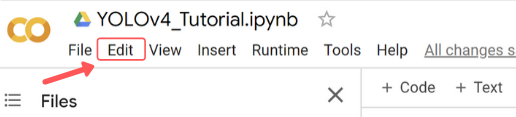
### ii) Click **Notebook Settings** within dropdown
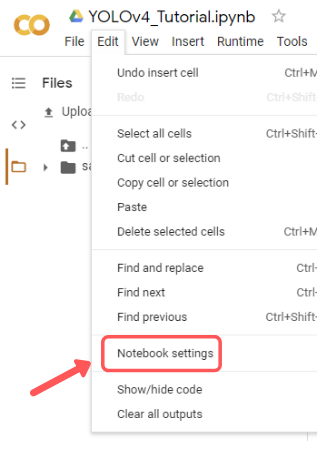
### iii) Under 'Hardware Accelerator' select **GPU** and then hit **Save**
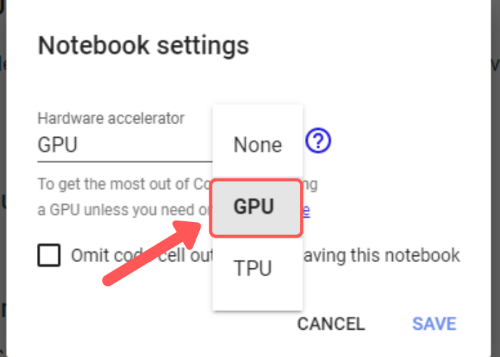

Your notebook should now have GPU enabled!

## Step 2: Cloning the Repository
The following cell will clone the yolov4-deepsort repository from github, to enable the rest of the tutorial and grab the code.

In [1]:
# clone repository for deepsort with yolov4
!git clone https://github.com/nicedaddy/yolov4_deepsort_lane_detection.git

Cloning into 'yolov4_deepsort_lane_detection'...
remote: Enumerating objects: 122, done.
remote: Counting objects: 100% (122/122), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 122 (delta 16), reused 122 (delta 16), pack-reused 0
Receiving objects: 100% (122/122), 101.43 MiB | 22.49 MiB/s, done.
Resolving deltas: 100% (16/16), done.


In [7]:
# step into the yolov4-deepsort folder
%cd /content/yolov4_deepsort_lane_detection

/content/yolov4_deepsort_lane_detection


## Step 3: Install Dependencies
Google Colab should have all the necessary dependencies installed already within your notebook. I have left this section here as a backup plan if for some reason you run into any dependency issues while running DeepSort.

In [3]:
# uncomment below line ONLY if you run into any dependency issues while following tutorial
#이거 requirements-gpu에서 tensorflow 2.3.0rc0 지운것
!pip install -r requirements-gpu.txt

     |████████████████████████████████| 320.4 MB 48 kB/s 
     |████████████████████████████████| 28.7 MB 33.5 MB/s 
     |████████████████████████████████| 459 kB 47.6 MB/s 
     |████████████████████████████████| 2.9 MB 26.1 MB/s 
     |████████████████████████████████| 20.1 MB 1.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: opencv-python
    Found existing insta

## Step 5: Convert YOLOv4 Darknet Weights to TensorFlow model
We will be running the DeepSort object tracker using TensorFlow. In order to accomplish this we must first convert the yolov4 weights into a tensorflow model.

In [20]:
# Convert darknet weights to tensorflow model
!python save_model.py --weights ./data/custom-yolov4-tiny-detector_best.weights --output ./checkpoints/yolov4-tiny-416 --model yolov4 --tiny

2022-03-26 02:54:32.185321: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-26 02:54:33.869894: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-03-26 02:54:33.893181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-26 02:54:33.894087: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-03-26 02:54:33.894135: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-26 02:54:33.896106: I tensorflow/stream_executor/platform/defa

In [21]:
#tf를 tflite로 바꾸기 // 추가한 것
!python save_model.py --weights ./data/custom-yolov4-tiny-detector_best.weights --output ./checkpoints/yolov4-tiny-416 --input_size 416 --model yolov4 --tiny --framework tflite

#출처: https://byeon-sg.tistory.com/entry/Yolo-안드로이드-스튜디오-연동 [wave]

2022-03-26 02:55:00.722158: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-26 02:55:02.492080: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-03-26 02:55:02.512792: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-26 02:55:02.513628: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-03-26 02:55:02.513689: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-26 02:55:02.515606: I tensorflow/stream_executor/platform/defa

In [22]:
# yolov4(tflite폴더 만들기?) // 추가한 것
!python convert_tflite.py --weights ./checkpoints/yolov4-tiny-416 --output ./checkpoints/yolov4-tiny-416.tflite

#출처: https://byeon-sg.tistory.com/entry/Yolo-안드로이드-스튜디오-연동 [wave]

2022-03-26 02:55:25.669840: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-26 02:55:27.376488: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2022-03-26 02:55:27.398181: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-26 02:55:27.399126: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2022-03-26 02:55:27.399171: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2022-03-26 02:55:27.401101: I tensorflow/stream_executor/platform/defa

## Step 6: Running DeepSort with YOLOv4

Let the fun begin! You can now run your object tracker. Unfortunately Google Colab doesn't support displaying video while its being processed. So we will be suppressing the output of the object tracker as it runs and then we will display the entire video once it has finished processing.

In [3]:
!pip install pyshine

In [23]:
# run DeepSort with YOLOv4 Object Detections as backbone (enable --info flag to see info about tracked objects)// 지금 이거는 tflite로 바꾼 것 이다


!python object_tracker.py --weights ./checkpoints/yolov4-tiny-416.tflite --model yolov4 --video ./data/video/test_sample.mp4 --output ./outputs/tiny111.avi --tiny --dont_show --info


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
Tracker ID: 138, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (12, 400, 249, 649)
FPS: 3.38
Frame #:  1128
Tracker ID: 23, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (700, 381, 900, 507)
Tracker ID: 73, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (562, 372, 635, 432)
Tracker ID: 93, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (875, 363, 1060, 487)
Tracker ID: 99, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (443, 378, 521, 422)
Tracker ID: 116, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (646, 366, 758, 443)
FPS: 3.39
Frame #:  1129
Tracker ID: 23, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (704, 385, 895, 505)
Tracker ID: 73, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (562, 372, 635, 432)
Tracker ID: 93, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (877, 365, 1056, 485)
Tracker ID: 99, Class: vehicle,  BBox Coords (xmin, ymin, xmax, ymax): (443, 378, 5

In [24]:
# run DeepSort with YOLOv4 Object Detections as backbone (enable --info flag to see info about tracked objects),(TF전용)
#!python object_tracker.py --weights ./checkpoints/yolov4-tiny-416 --model yolov4 --video ./data/video/test_sample.mp4 --output ./outputs/tiny111.avi --tiny --dont_show --info

In [25]:
# define helper function to display videos
import io 
from IPython.display import HTML
from base64 import b64encode
def show_video(file_name, width=640):
  # show resulting deepsort video
  mp4 = open(file_name,'rb').read()
  data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
  return HTML("""
  <video width="{0}" controls>
        <source src="{1}" type="video/mp4">
  </video>
  """.format(width, data_url))

In [26]:
# convert resulting video from avi to mp4 file format
import os
path_video = os.path.join("outputs","tiny111.avi")
%cd outputs/
!ffmpeg -y -loglevel panic -i tiny111.avi tiny111.mp4
%cd ..

# output object tracking video
#path_output = os.path.join("outputs","tiny111.mp4")
#show_video(path_output, width=960)

/content/yolov4_deepsort_lane_detection/outputs
/content/yolov4_deepsort_lane_detection


# Congrats!

이건 TFLITE 버전